# Airbnb Germany Analysis

The data came from [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a provider of Airbnb data for metropoles around the world.

Within this project 3 questions should be answered via this data:
1. Is there a seasonality in Munich rental prices?
2. How did COVID-19 impact the Airbnb offer in Munich?
3. What are the main features affecting prices for Airbnb?

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import datetime
from dateutil.relativedelta import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px 
import plotly.graph_objects as go
import datapane as dp

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

plotly_template = 'plotly_white' # 'plotly_dark' for dark mode enablement, 'plotly_white' for white mode enablement
# dp.login(token="") #used to publish the plots to datapane.

In [2]:
#Listing
listing_jun_ya = pd.read_csv('.\\Munich\\listings\\listings_20190624.csv'
                             ,delimiter=',')

listing_jan = pd.read_csv('.\\Munich\\listings\\listings_20200122.csv'
                          ,delimiter=',')

listing_apr = pd.read_csv('.\\Munich\\listings\\listings_20200425.csv'
                          ,delimiter=',')

listing_jun = pd.read_csv('.\\Munich\\listings\\listings_20200620.csv'
                          ,delimiter=',')

listing_oct = pd.read_csv('.\\Munich\\listings\\listings_20201026.csv'
                          ,delimiter=',')

#Calendar
calendar_jun_ya = pd.read_csv('.\\Munich\\calendar\\calendar_20190624.csv.gz'
                              ,delimiter=','
                              ,compression='gzip'
                              ,low_memory=False)

calendar_jan = pd.read_csv('.\\Munich\\calendar\\calendar_20200122.csv.gz'
                           ,delimiter=','
                           ,compression='gzip'
                           ,low_memory=False)

calendar_apr = pd.read_csv('.\\Munich\\calendar\\calendar_20200425.csv.gz'
                           ,delimiter=','
                           ,compression='gzip'
                           ,low_memory=False)

calendar_jun = pd.read_csv('.\\Munich\\calendar\\calendar_20200620.csv.gz'
                           ,delimiter=','
                           ,compression='gzip'
                           ,low_memory=False)

calendar_oct = pd.read_csv('.\\Munich\\calendar\\calendar_20201026.csv.gz'
                           ,delimiter=','
                           ,compression='gzip'
                           ,low_memory=False)

#Detailed Listing
listing_detailed_oct = pd.read_csv('.\\Munich\\listings_detailed\\listings_20201026.csv.gz'
                                   ,delimiter=','
                                   ,compression='gzip'
                                   ,low_memory=False)

In [3]:
listing_oct.head()

id                                   name  host_id host_name  \
0   97945       Deluxw-Apartm. with roof terrace   517685  Angelika   
1  170154  Own floor & bath, parking & breakfast   108297      Alex   
2  170815    Your own flat near central station!   814793      Inge   
3  171749      1min to subway - Wettersteinplatz   819382     Tarek   
4  172672      Cozy guest room in high-end flat.   823913     Karin   

   neighbourhood_group            neighbourhood  latitude  longitude  \
0                  NaN                   Hadern  48.11476   11.48782   
1                  NaN        Sendling-Westpark  48.10751   11.52733   
2                  NaN    Neuhausen-Nymphenburg  48.16132   11.54154   
3                  NaN  Untergiesing-Harlaching  48.10583   11.57843   
4                  NaN           Schwabing-West  48.16341   11.56366   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     80               2                130  2019-10-03   
1     Private room     55               2                476  2020-09-10   
2  Entire home/apt     65               3                 64  2020-02-18   
3     Private room     30               3                354  2020-10-11   
4     Private room     49               1                214  2020-09-05   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               1.21                               2                 0  
1               4.30                               1               346  
2               0.57                               1                90  
3               3.15                               1                50  
4               2.72                               2                 8

In [4]:
listing_oct.describe(include='all')

id                               name       host_id  \
count   4.694000e+03                               4693  4.694000e+03   
unique           NaN                               4589           NaN   
top              NaN  Chummy Room, 5 min to Oktoberfest           NaN   
freq             NaN                                  6           NaN   
mean    2.675528e+07                                NaN  1.033751e+08   
std     1.430609e+07                                NaN  1.102704e+08   
min     9.794500e+04                                NaN  3.735400e+04   
25%     1.498771e+07                                NaN  1.371489e+07   
50%     2.881479e+07                                NaN  4.985997e+07   
75%     3.866877e+07                                NaN  1.758315e+08   
max     4.604555e+07                                NaN  3.730277e+08   

       host_name  neighbourhood_group                 neighbourhood  \
count       4693                  0.0                          4694   
unique      1705                  NaN                            25   
top       Thomas                  NaN  Ludwigsvorstadt-Isarvorstadt   
freq          45                  NaN                           533   
mean         NaN                  NaN                           NaN   
std          NaN                  NaN                           NaN   
min          NaN                  NaN                           NaN   
25%          NaN                  NaN                           NaN   
50%          NaN                  NaN                           NaN   
75%          NaN                  NaN                           NaN   
max          NaN                  NaN                           NaN   

           latitude    longitude        room_type         price  \
count   4694.000000  4694.000000             4694   4694.000000   
unique          NaN          NaN                4           NaN   
top             NaN          NaN  Entire home/apt           NaN   
freq            NaN          NaN             2462           NaN   
mean      48.140455    11.566217              NaN    112.552194   
std        0.026335     0.048053              NaN    253.516653   
min       48.070270    11.386160              NaN      0.000000   
25%       48.122770    11.539928              NaN     50.000000   
50%       48.137845    11.566040              NaN     75.000000   
75%       48.157987    11.589037              NaN    120.000000   
max       48.229420    11.720310              NaN  12000.000000   

        minimum_nights  number_of_reviews last_review  reviews_per_month  \
count      4694.000000        4694.000000        3613        3613.000000   
unique             NaN                NaN         744                NaN   
top                NaN                NaN  2019-10-06                NaN   
freq               NaN                NaN         142                NaN   
mean          6.959310          23.768428         NaN           0.929864   
std          26.161871          54.698821         NaN           1.484833   
min           1.000000           0.000000         NaN           0.010000   
25%           1.000000           1.000000         NaN           0.160000   
50%           2.000000           4.000000         NaN           0.420000   
75%           3.000000          20.000000         NaN           1.050000   
max         720.000000         719.000000         NaN          25.520000   

        calculated_host_listings_count  availability_365  
count                      4694.000000       4694.000000  
unique                             NaN               NaN  
top                                NaN               NaN  
freq                               NaN               NaN  
mean                          2.293140        173.743076  
std                           3.227659        131.799768  
min                           1.000000          0.000000  
25%                           1.000000         66.250000  
50%                           1.000000 

In [5]:
listing_detailed_oct.head()

id                          listing_url       scrape_id last_scraped  \
0   97945   https://www.airbnb.com/rooms/97945  20201026064122   2020-10-26   
1  170154  https://www.airbnb.com/rooms/170154  20201026064122   2020-10-26   
2  170815  https://www.airbnb.com/rooms/170815  20201026064122   2020-10-26   
3  171749  https://www.airbnb.com/rooms/171749  20201026064122   2020-10-26   
4  172672  https://www.airbnb.com/rooms/172672  20201026064122   2020-10-26   

                                    name  \
0       Deluxw-Apartm. with roof terrace   
1  Own floor & bath, parking & breakfast   
2    Your own flat near central station!   
3      1min to subway - Wettersteinplatz   
4      Cozy guest room in high-end flat.   

                                         description  \
0  <b>The space</b><br />We offer a modern, quiet...   
1  Enjoy a quiet neighbourhood, easy access to th...   
2  <b>The space</b><br />It's a 1-room studio app...   
3  The apartment is located in a very quiet locat...   
4  Comfortable guest room in central area of Muni...   

                               neighborhood_overview  \
0  We are living in a outskirt of Munich its call...   
1                                                NaN   
2                                                NaN   
3  Nearby is the FC Bayern Munich area, about 10 ...   
4  Residential area in Schwabing-West. There are ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/2459996/10b4c...   517685   
1  https://a0.muscache.com/pictures/31636890/593e...   108297   
2  https://a0.muscache.com/pictures/86b4037c-098a...   814793   
3  https://a0.muscache.com/pictures/88ca5688-2b45...   819382   
4  https://a0.muscache.com/pictures/41728512/72fd...   823913   

                                   host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/517685  Angelika  2011-04-18   
1  https://www.airbnb.com/users/show/108297      Alex  2010-04-14   
2  https://www.airbnb.com/users/show/814793      Inge  2011-07-13   
3  https://www.airbnb.com/users/show/819382     Tarek  2011-07-14   
4  https://www.airbnb.com/users/show/823913     Karin  2011-07-15   

              host_location  \
0   Munich, Bayern, Germany   
1   Munich, Bayern, Germany   
2  Munich, Bavaria, Germany   
3  Munich, Bavaria, Germany   
4  Munich, Bavaria, Germany   

                                          host_about host_response_time  \
0  Ich freue mich auf viele internationale Gäste!...                NaN   
1  We love to travel and dream of living in a hou...     within an hour   
2                                        Die \nH\n\n       within a day   
3  Lieber Besucher/in\n\nich bin Tarek und wohne ...     within an hour   
4  I am an outdoorsy person that spends her time ...     within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                NaN                 100%                 t   
1               100%                  90%                 t   
2               100%                  67%                 f   
3               100%                  98%                 t   
4               100%                 100%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/517685/profil...   
1  https://a0.muscache.com/im/pictures/user/38794...   
2  https://a0.muscache.com/im/pictures/user/d5dec...   
3  https://a0.muscache.com/im/pictures/user/31c24...   
4  https://a0.muscache.com/im/pictures/user/419e7...   

                                    host_picture_url  \
0  https://a0.muscache.com/im/users/517685/profil...   
1  https://a0.muscache.com/im/pictures/user/38794...   
2  https://a0.muscache.com/im/pictures/user/d5dec...   
3  https://a0.muscache.com/im/pictures/user/31c24...   
4  https://a0.muscache.com/im/pictures/user/419e7...   

          host_neighbourhood  host_listings_count  host_total_listings_count  \
0               

In [6]:
listing_detailed_oct.describe(include='all')

id                            listing_url     scrape_id  \
count   4.694000e+03                                   4694  4.694000e+03   
unique           NaN                                   4694           NaN   
top              NaN  https://www.airbnb.com/rooms/45686448           NaN   
freq             NaN                                      1           NaN   
mean    2.675528e+07                                    NaN  2.020103e+13   
std     1.430609e+07                                    NaN  3.008133e-01   
min     9.794500e+04                                    NaN  2.020103e+13   
25%     1.498771e+07                                    NaN  2.020103e+13   
50%     2.881479e+07                                    NaN  2.020103e+13   
75%     3.866877e+07                                    NaN  2.020103e+13   
max     4.604555e+07                                    NaN  2.020103e+13   

       last_scraped                               name  \
count          4694                               4693   
unique            1                               4589   
top      2020-10-26  Chummy Room, 5 min to Oktoberfest   
freq           4694                                  6   
mean            NaN                                NaN   
std             NaN                                NaN   
min             NaN                                NaN   
25%             NaN                                NaN   
50%             NaN                                NaN   
75%             NaN                                NaN   
max             NaN                                NaN   

                                              description  \
count                                                4522   
unique                                               4297   
top     Stay stylish - das Motto der Marke Rilano 24|7...   
freq                                                   22   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    neighborhood_overview  \
count                                                2495   
unique                                               2197   
top     In der Parkstadt Schwabing, auch "Silicon Schw...   
freq                                                   21   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              picture_url       host_id  \
count                                                4694  4.694000e+03   
unique                                               4523           NaN   
top     https://a0.muscache.com/pictures/miso/Hosting-...           NaN   
freq                                                   18           NaN   
mean                                                  NaN  1.033751e+08   
std                                                   NaN  1.102704e+08   
min                                                   NaN  3.735400e+04   
25%                                                   NaN  1.371489e+07   
50%                                                   NaN  4.985997e+07   
75%                                                   NaN  1.758315e+08   
max                                                   NaN  3.730277e+08   

                             

In [7]:
calendar_oct.head()

listing_id        date available   price adjusted_price  minimum_nights  \
0       97945  2020-10-26         f  $80.00         $80.00               2   
1      200791  2020-10-26         t  $29.00         $29.00              15   
2      200791  2020-10-27         t  $29.00         $29.00              15   
3      200791  2020-10-28         t  $29.00         $29.00              15   
4      200791  2020-10-29         t  $29.00         $29.00              15   

   maximum_nights  
0              90  
1             300  
2             300  
3             300  
4             300

In [8]:
calendar_oct.describe(include='all', datetime_is_numeric=True)

listing_id        date available    price adjusted_price  \
count   1.713287e+06     1713287   1713287  1713287        1713287   
unique           NaN         365         2      777            776   
top              NaN  2021-08-09         f   $50.00         $50.00   
freq             NaN        4694    859851    66389          66195   
mean    2.675504e+07         NaN       NaN      NaN            NaN   
std     1.430451e+07         NaN       NaN      NaN            NaN   
min     9.794500e+04         NaN       NaN      NaN            NaN   
25%     1.498742e+07         NaN       NaN      NaN            NaN   
50%     2.880966e+07         NaN       NaN      NaN            NaN   
75%     3.866889e+07         NaN       NaN      NaN            NaN   
max     4.604555e+07         NaN       NaN      NaN            NaN   

        minimum_nights  maximum_nights  
count     1.713287e+06    1.713287e+06  
unique             NaN             NaN  
top                NaN             NaN  
freq               NaN             NaN  
mean      6.976033e+00    3.658165e+06  
std       2.454004e+01    8.854974e+07  
min       1.000000e+00    1.000000e+00  
25%       1.000000e+00    2.800000e+01  
50%       2.000000e+00    1.125000e+03  
75%       3.000000e+00    1.125000e+03  
max       7.200000e+02    2.147484e+09

In [9]:
calendar_oct.date.min()

'2020-10-26'

In [10]:
calendar_oct.date.max()

'2021-10-25'

In [11]:
calendar_jan.date.min()

'2020-01-22'

In [12]:
calendar_jan.date.max()

'2021-01-20'

# Question 1: Is there a seasonality in Munich rental prices?

In [13]:
#concatting jan listing and october listing information w/o overlap
calendar_jan_til_oct = calendar_jan[calendar_jan['date'] < calendar_oct.date.min()]
calendar = pd.concat([calendar_oct, calendar_jan_til_oct], axis=0)
calendar = calendar[calendar['available'] == 't']

In [14]:
#adding calendar week
calendar['calendar_week'] = pd.DatetimeIndex(calendar['date']).week
#dealing with price, which is currently a string
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype('float')

<ipython-input-14-6c248c57a746>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  calendar['calendar_week'] = pd.DatetimeIndex(calendar['date']).week


In [15]:
#aggregating on day level and calculating the average for price_x per day 
calendar_time_series = calendar.groupby('date').mean()
calendar_time_series.reset_index(level=0, inplace=True)

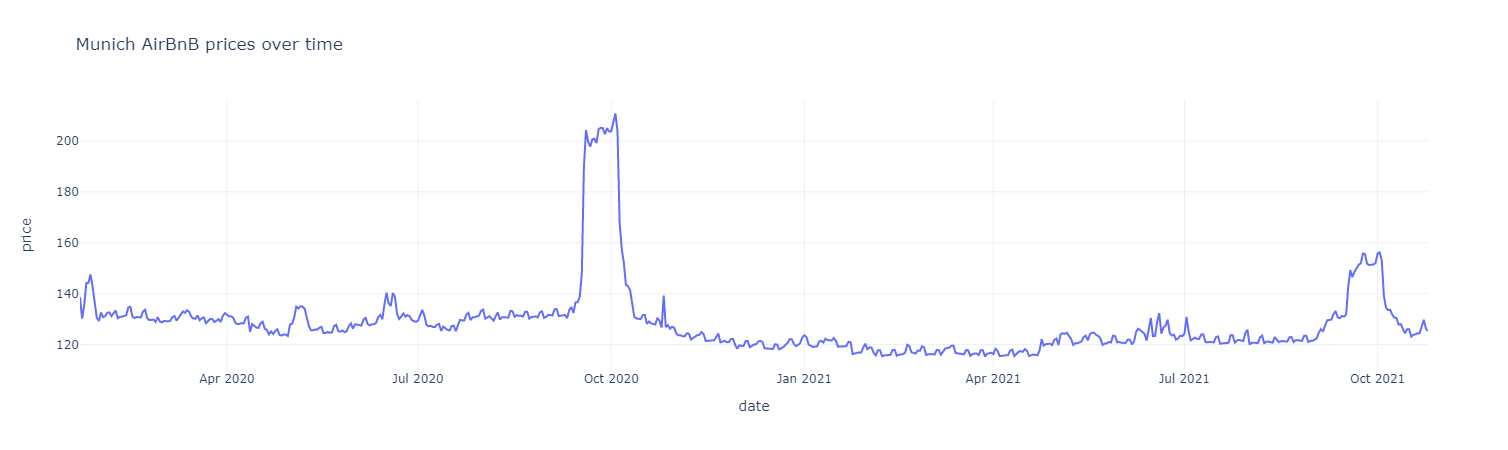

In [16]:
#plotting the price per day for the time range january 2020 until october 2021
plot_prices_over_time = px.line(x="date", y="price", data_frame=calendar_time_series, title="Munich AirBnB prices over time", template=plotly_template)
plot_prices_over_time.show()

# publishing the chart to datapane for visualization in the blogpost
# report_prices_over_time = dp.Report(dp.Plot(plot_prices_over_time) ) #Create a report
# report_prices_over_time.publish(name='plot_prices_over_time', open=True, visibility='PUBLIC') #Publish the report

In the plot 'Munich AirBnB prices over time' we can clearly see, that mid of September until beginning of October is in Munich a remarkable markup visible. This markup can be seen for both, 2020 and 2021.
Furthermore, a very light price markup is notable during the spring/summer months.

In [17]:
#joining the df with the listing datasets to retrieve the neighbourhood information
listing = pd.concat([listing_oct, listing_jan], axis=0)
calendar_merged = calendar.merge(listing, how='inner', left_on='listing_id', right_on='id')

In [18]:
#aggregating on day and neighbourhood level and calculating the average for price_x per day 
calendar_time_series = calendar_merged.groupby(['date','neighbourhood']).mean()
calendar_time_series.reset_index(level=0, inplace=True)
calendar_time_series.reset_index(level=0, inplace=True)

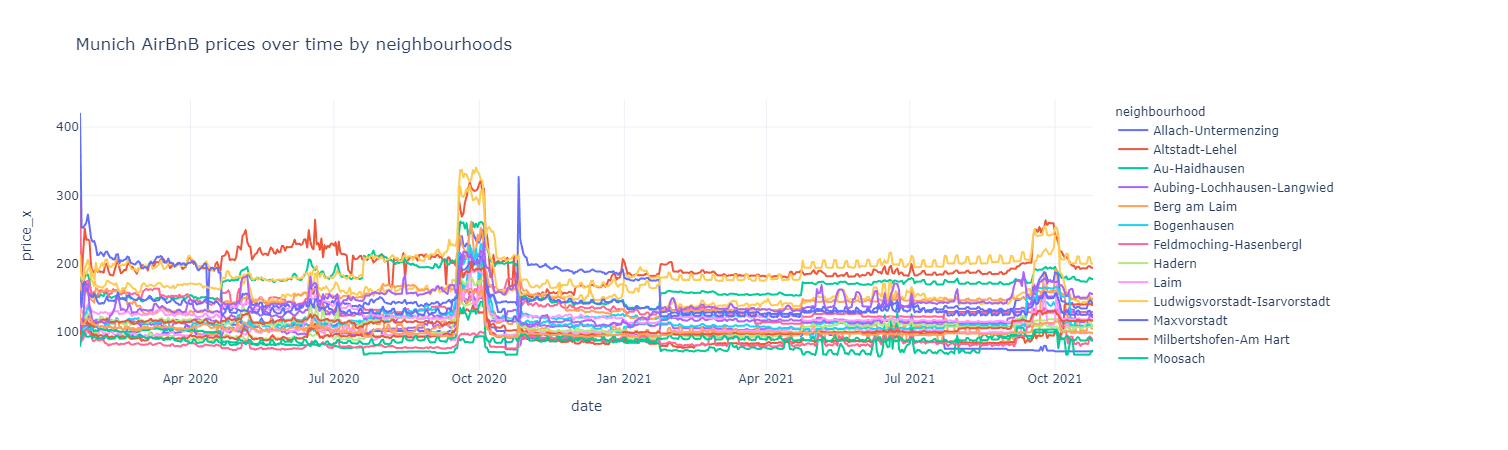

In [19]:
#plotting the price per day for the time range january 2020 until october 2021
plot_prices_over_time_neighbourhoods = px.line(data_frame=calendar_time_series, x="date", y="price_x", color='neighbourhood', title="Munich AirBnB prices over time by neighbourhoods", template=plotly_template)
plot_prices_over_time_neighbourhoods.show()

This plot is a very cluttered. This plot is used as a working plot. Please feel free to use the plotly functionality to click in the legend to filter for specific neighbourhoods. 
In the next section a sample with fewer neighbourhoods will be created. 

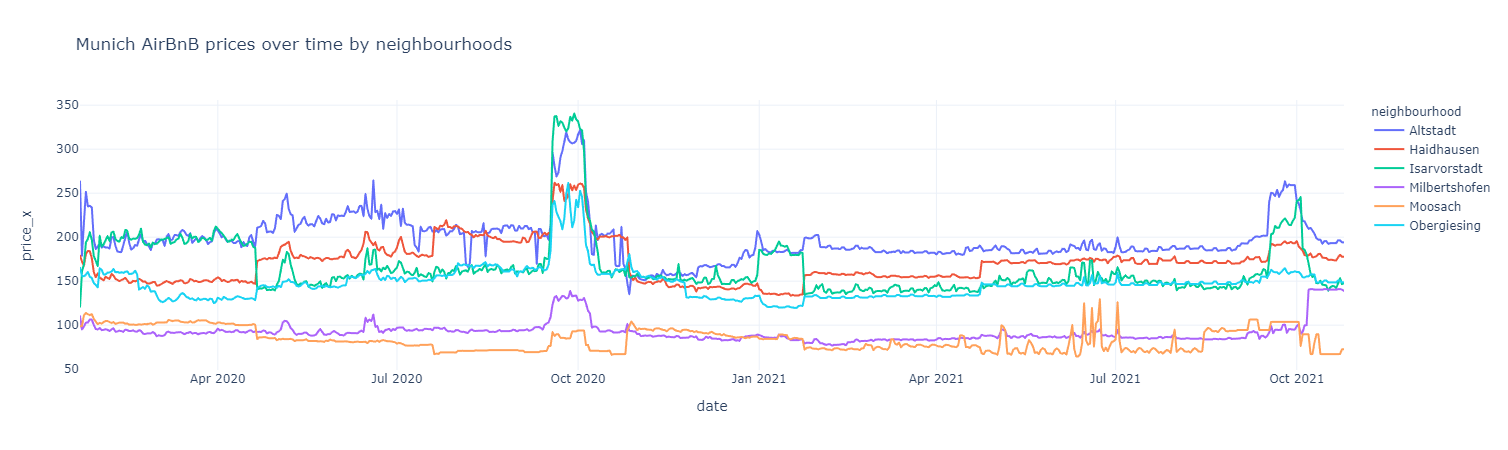

In [20]:
#creating a subset of above chart to visualize a sample

calendar_time_series_reduced = calendar_time_series[calendar_time_series['neighbourhood'].isin(['Altstadt-Lehel',
                                                                                                'Au-Haidhausen',
                                                                                                'Milbertshofen-Am Hart',
                                                                                                'Ludwigsvorstadt-Isarvorstadt',
                                                                                                'Obergiesing',
                                                                                                'Moosach'])].copy()

rename_dict = {'Altstadt-Lehel':'Altstadt',
               'Au-Haidhausen':'Haidhausen',
               'Milbertshofen-Am Hart':'Milbertshofen',
               'Ludwigsvorstadt-Isarvorstadt':'Isarvorstadt'}

calendar_time_series_reduced.replace({'neighbourhood':rename_dict}, inplace=True)

plot_prices_over_time_neighbourhoods = px.line(data_frame=calendar_time_series_reduced, x="date", y="price_x", color='neighbourhood', title="Munich AirBnB prices over time by neighbourhoods", template=plotly_template)
plot_prices_over_time_neighbourhoods.show()


# publishing the chart to datapane for visualization in the blogpost
# report_prices_over_time_neighbourhoods = dp.Report(dp.Plot(plot_prices_over_time_neighbourhoods) ) #Create a report
# report_prices_over_time_neighbourhoods.publish(name='plot_prices_over_time_neighbourhoods', open=True, visibility='PUBLIC') #Publish the report


In the plot 'AirBnB prices over time by neighbourhoods' we see, that the observed seasonality is applicable for nearly every neighbourhood in Munich. 
Furthermore, we can see that for a few neighbourhoods (e.g. Altstadt) we have an additional seasonality, which is during the spring/summer months (approx. end of april until end beginning of October)

In [21]:
#what is the octoberfest price increase in Munich total?

octoberfest = (calendar_time_series['date'] >= '2020-09-19') & (calendar_time_series['date'] <= '2020-10-04')
non_octoberfest = (calendar_time_series['date'] < '2020-09-19') | (calendar_time_series['date'] > '2020-10-04') & (calendar_time_series['date'] <= '2020-12-31')

mean_octoberfest = calendar_time_series.loc[octoberfest]['price_x'].mean()
mean_non_octoberfest = calendar_time_series.loc[non_octoberfest]['price_x'].mean()

mean = mean_octoberfest/mean_non_octoberfest-1

median_octoberfest = calendar_time_series.loc[octoberfest]['price_x'].median()
median_non_octoberfest = calendar_time_series.loc[non_octoberfest]['price_x'].median()

median = median_octoberfest/median_non_octoberfest-1


In [22]:
print('The mean price increase during the Octoberfest time is {:.0%}; the median is {:.0%}'.format(mean, median))

The mean price increase during the Octoberfest time is 52%; the median is 61%


In [23]:
#what is the octoberfest price increase per neighbourhood district?

octoberfest = (calendar_time_series['date'] >= '2020-09-19') & (calendar_time_series['date'] <= '2020-10-04')
non_octoberfest = (calendar_time_series['date'] < '2020-09-19') | (calendar_time_series['date'] > '2020-10-04') & (calendar_time_series['date'] <= '2020-12-31')

mean_octoberfest = calendar_time_series.loc[octoberfest].groupby(['neighbourhood']).mean()
mean_non_octoberfest = calendar_time_series.loc[non_octoberfest].groupby(['neighbourhood']).mean()

df_mean = pd.DataFrame(mean_octoberfest['price_x']/mean_non_octoberfest['price_x']-1).sort_values('price_x', ascending=False).rename(columns={'price_x':'mean_markup_rate'})
df_mean.reset_index(inplace=True)


median_octoberfest = calendar_time_series.loc[octoberfest].groupby(['neighbourhood']).median()
median_non_octoberfest = calendar_time_series.loc[non_octoberfest].groupby(['neighbourhood']).median()

df_median = pd.DataFrame(median_octoberfest['price_x']/median_non_octoberfest['price_x']-1).sort_values('price_x', ascending=False).rename(columns={'price_x':'median_markup_rate'})
df_median.reset_index(inplace=True)

df_markup_rate = df_mean.merge(df_median, how='inner', on='neighbourhood')
df_markup_rate.sort_values('mean_markup_rate', inplace=True)

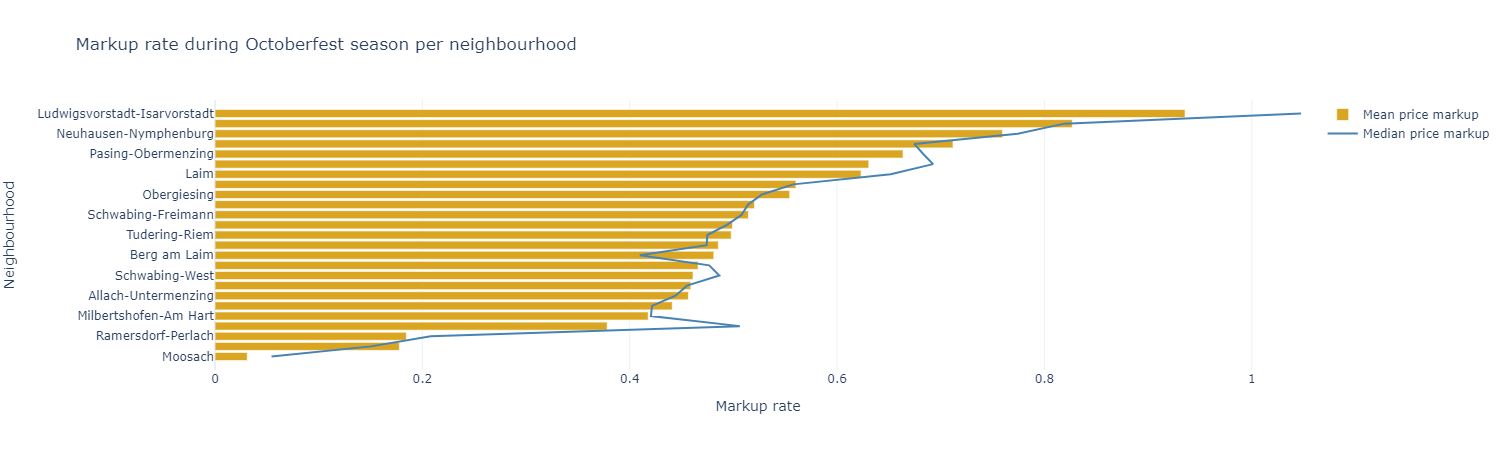

In [24]:
plot_markup_rate = go.Figure()

plot_markup_rate.add_trace(
    go.Bar(
        y=df_markup_rate['neighbourhood'],
        x=df_markup_rate['mean_markup_rate'],
        
        hovertemplate =
        '<b>Neighbourhood</b>: %{y}'+
        '<br><b>Mean Markup Rate</b>: %{x:.0%f}',
        
        name='Mean price markup',
        orientation='h', 
        marker_color='goldenrod'
    ))

plot_markup_rate.add_trace(
    go.Scatter(
        y=df_markup_rate['neighbourhood'],
        x=df_markup_rate['median_markup_rate'],
        
        hovertemplate =
        '<b>Neighbourhood</b>: %{y}'+
        '<br><b>Median Markup Rate</b>: %{x:.0%f}',
        
        mode='lines', name='Median price markup',
        marker_color='steelblue'
    ))

plot_markup_rate.update_layout(
    title='Markup rate during Octoberfest season per neighbourhood',
    xaxis_title='Markup rate',
    yaxis_title='Neighbourhood', 
    template=plotly_template
    )

plot_markup_rate.show()

# report_octoberfest_markup_per_neighbourhoods = dp.Report(dp.Plot(plot_markup_rate) ) #Create a report
# report_octoberfest_markup_per_neighbourhoods.publish(name='plot_markup_rate', open=True, visibility='PUBLIC') #Publish the report

In the plot 'Markup rate during Octoberfest season per neighbourhood' we see per neighbourhood, what is the average price markup rate and what is the median price markup rate. 
Especially the neighbourhood 'Ludwigsvorstadt' - the neighbourhood where the Octoberfest takes place - has the highest price increase. 

## Answer Question 1: Is there a seasonality in Munich rental prices?

Yes, there is clearly a seasonality in Munich rental prices. 
In 2020 the seasonality is from September 19th until October 4th. This is exactly the date when the Octoberfest was planned to take place in Munich. For 2021 we also see a peak in the prices between September 18th and October 3rd. This is as well the planned Octoberfest date. Depending of the neighbourhood the markup range goes from 3% until 94% in average.

In the map below, we can see, where the districts are. 
The Octoberfest takes place in the center of munich in district 2 in the west of 'Ludwigsvorstadt - Isarvorstadt'.
![title](Munich/Map_of_districts_in_Munich.png)

Furthermore, we observed a price markup during the spring/summer months.

# Question 2: How did COVID-19 impact the Airbnb offer in Munich? 

In [25]:
def calendar_month_comparison_preparation(df1, df2):
    '''
    INPUT:
    df1 - a calendar dataframe from airbnb data
    df2 - the corresponding listing dataframe from airbnb data

    OUTPUT:
    df - joined and preprocessed dataframe for calendar month comparison
    
    This function joins df1 and df2, adds month and effective columns, casts price_x to float, 
    filters the data for the first full month in dataframe until 2020-12-31 and only available rentals. 
    The output LOD is effective and month, the measures are count of listings and mean of price_x
    '''
    
    df = df1.merge(df2, how='inner', left_on='listing_id', right_on='id')
    
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['price_x'] = df['price_x'].str.replace('$', '').str.replace(',', '').astype('float')
    
    effective_date = df.date.min()
    df['effective'] = effective_date
    
    date_transform = datetime.datetime.strptime(effective_date, '%Y-%m-%d')
    effective_year = date_transform.year
    date_transform = date_transform - datetime.timedelta(days=date_transform.day-1) + relativedelta(months=+1)
    date_transform = date_transform.strftime('%Y-%m-%d')
    
    df = df[(df.date <= str(effective_year) + '-12_31') &
            (df.date >= date_transform) & 
            (df.available == 't')]\
                [['effective','month','listing_id','price_x']].groupby(['effective','month']) \
                                                              .agg({'listing_id':'count', 'price_x':'mean'}) \
                                                              .rename(columns={'listing_id':'count', 'price_x':'price_avg'}) \
                                                              .reset_index()
    
    return df

In [26]:
#creation of a dataset containing the information 'month','count of rental vacation','average price' per file

calendar_months = pd.concat([calendar_month_comparison_preparation(calendar_jan, listing_jan), 
                             calendar_month_comparison_preparation(calendar_apr, listing_apr), 
                             calendar_month_comparison_preparation(calendar_jun, listing_jun), 
                             #calendar_month_comparison_preparation(calendar_oct, listing_oct), adds no value in plot
                             calendar_month_comparison_preparation(calendar_jun_ya, listing_jun_ya)
                            ], axis=0)

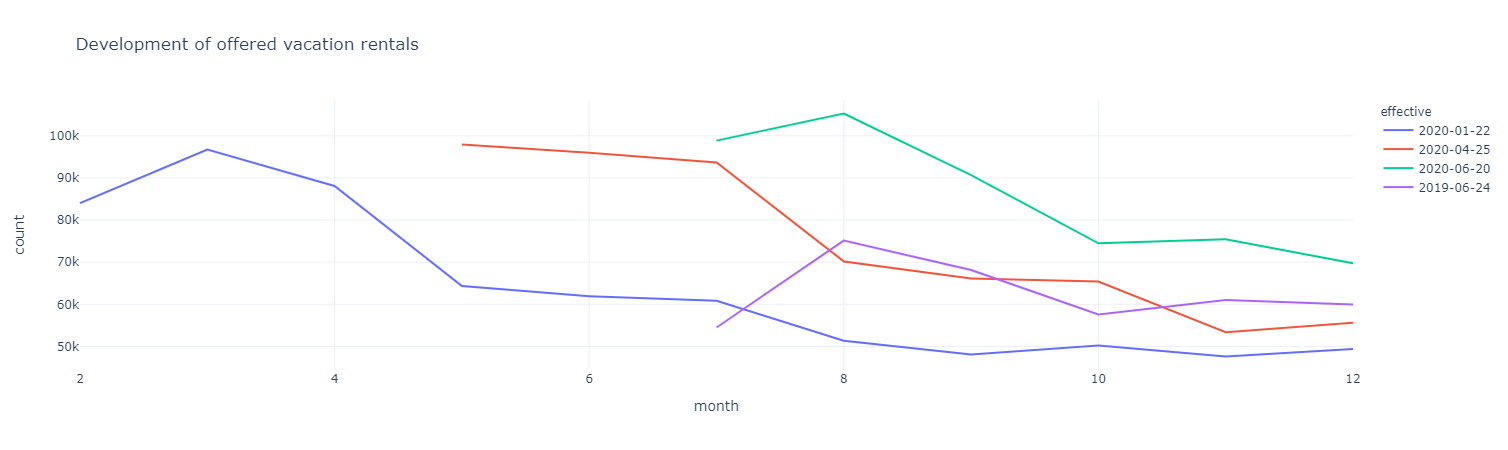

In [27]:
#plotting the vacation rental supply over time per file. 

plot_dev_of_offered_rentals = px.line(data_frame=calendar_months, x="month", y="count", color='effective', title="Development of offered vacation rentals", template=plotly_template)
plot_dev_of_offered_rentals.show()

# publishing the chart to datapane for visualization in the blogpost
# plot_dev_of_offered_rentals = dp.Report(dp.Plot(plot_dev_of_offered_rentals) ) #Create a report
# plot_dev_of_offered_rentals.publish(name='plot_dev_of_offered_rentals', open=True, visibility='PUBLIC') #Publish the report

In the plot 'Development of offered vacation rentals' we can see the following:
* each development shows the peak for month +1. Beyond month +1 we see a clear reduction of offered vacation rentals. 
* Germany was in Lockdown until end of April due to COVID-19. Therefore it is not suprising that the development for the April dataset looks quite different with no peack for month +1
* An interesting development can be seen, comparing June 2020 and June 2021 file (green vs. purple). To add context, Germany was in June 2020 not in a lockdown situation. All COVID-19 restrictions had been eased. We see quite a similar pathway for both lines. An interesting fact is, that the number of offered vacation rentals significantly rose. (e.g. 75k in 2019 and 105k in 2020 for April). So COVID-19 did obviously not have a bad effect on the supply. 

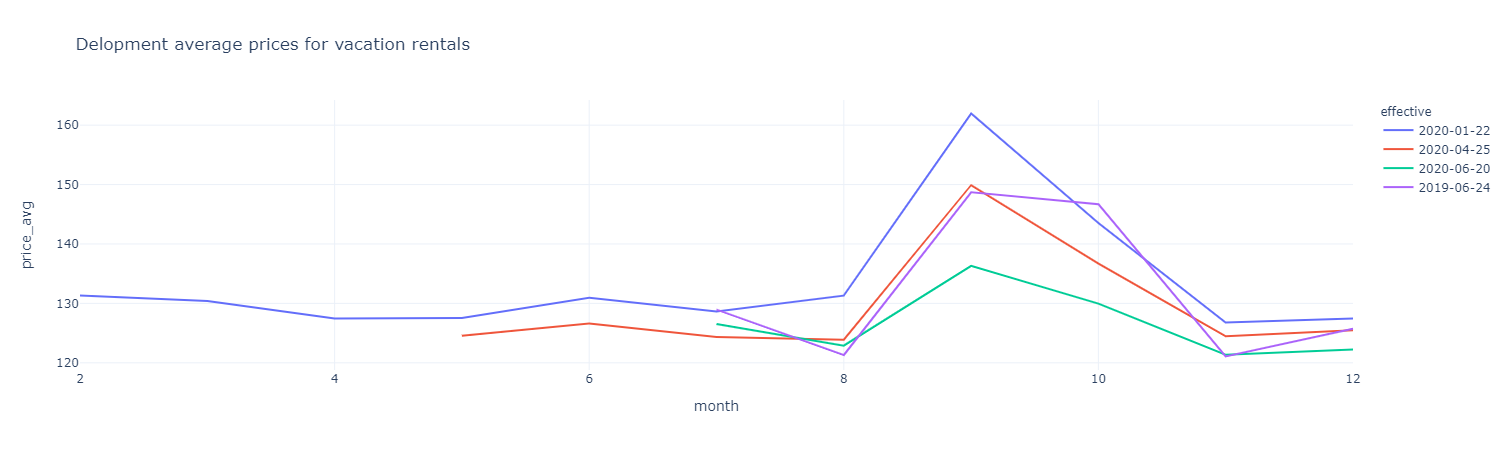

In [28]:
#plotting the vacation rental average price over time per file. 

plot_dev_avg_prices = px.line(data_frame=calendar_months, x="month", y="price_avg", color='effective', title="Delopment average prices for vacation rentals", template=plotly_template)
plot_dev_avg_prices.show()

# publishing the chart to datapane for visualization in the blogpost
# plot_dev_avg_prices = dp.Report(dp.Plot(plot_dev_avg_prices) ) #Create a report
# plot_dev_avg_prices.publish(name='plot_dev_avg_prices', open=True, visibility='PUBLIC') #Publish the report

In the plot 'Development average prices for vacation rentals' we see for the January file (blue) a clear peak (EUR 161) during September. The peak reduced significantly during the time. The April (red) file shows already a reduction (EUR 150) and the June (green) file shows a way lower peak (EUR 136). Especially, when comparing the prices for the June file 2020 (green) with the prices for June file 2019 (purple) we see as well a significant price reduction (EUR 149 to EUR 136). 

In [29]:
def calendar_listing_comparison_preparation(df1, df2):
    '''
    INPUT:
    df1 - a calendar dataframe from airbnb data
    df2 - the corresponding listing dataframe from airbnb data

    OUTPUT:
    df - joined and preprocessed dataframe for calendar month comparison
    
    This function joins df1 and df2, adds month column, casts price_x to float, 
    filters the data for the first full month in dataframe until 2020-12-31 and only available rentals. 
    The output LOD is listing_id and month, the measures is mean of price_x
    '''
    
    df = df1.merge(df2, how='inner', left_on='listing_id', right_on='id')
    
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['price_x'] = df['price_x'].str.replace('$', '').str.replace(',', '').astype('float')
    
    effective_date = df.date.min()
    effective_month = datetime.datetime.strptime(effective_date, '%Y-%m-%d').strftime('%b')
    
    date_transform = datetime.datetime.strptime(effective_date, '%Y-%m-%d')
    date_transform = date_transform - datetime.timedelta(days=date_transform.day-1) + relativedelta(months=+1)
    date_transform = date_transform.strftime('%Y-%m-%d')
    
    df = df[(df.date <= '2020-12_31') &
            (df.date >= date_transform) & 
            (df.available == 't')]\
                [['month','listing_id','price_x']].groupby(['month','listing_id']) \
                                                              .agg({'price_x':'mean'}) \
                                                              .rename(columns={'price_x':'avg_price_'+effective_month.lower()}) \
                                                              .reset_index()
    
    return df

In [30]:
calendar_merged_listing = calendar_listing_comparison_preparation(calendar_jan, listing_jan)\
                             .merge(calendar_listing_comparison_preparation(calendar_apr, listing_apr), how='inner', on=['month', 'listing_id'])\
                             .merge(calendar_listing_comparison_preparation(calendar_jun, listing_jun), how='inner', on=['month', 'listing_id'])\
                             .merge(calendar_listing_comparison_preparation(calendar_oct, listing_oct), how='inner', on=['month', 'listing_id'])

In [31]:
#calculating the average rental price per file. Due to inner join the file will only represent listings available in jan, jun and oct file. 
#the new calculated dataframe will be split into listings, which had a price reduction in the different files and those which did not. 

calendar_merged_listing['avg_price'] = calendar_merged_listing[['avg_price_jan','avg_price_apr','avg_price_jun','avg_price_oct']].mean(axis=1)
calendar_merged_listing['price_reduction'] =  (calendar_merged_listing['avg_price_jan'] != calendar_merged_listing['avg_price'])

price_changes = calendar_merged_listing.drop(['month'], axis=1).groupby(['price_reduction'])\
                                       .agg({'listing_id':'count', 'avg_price_jan':'mean', 'avg_price_apr':'mean', 'avg_price_jun':'mean', 'avg_price_oct':'mean'})\
                                       .rename(columns={'listing_id':'count', 'avg_price_jan':'January', 'avg_price_apr':'April', 'avg_price_jun':'June', 'avg_price_oct':'October'})

price_changes.reset_index(inplace=True)

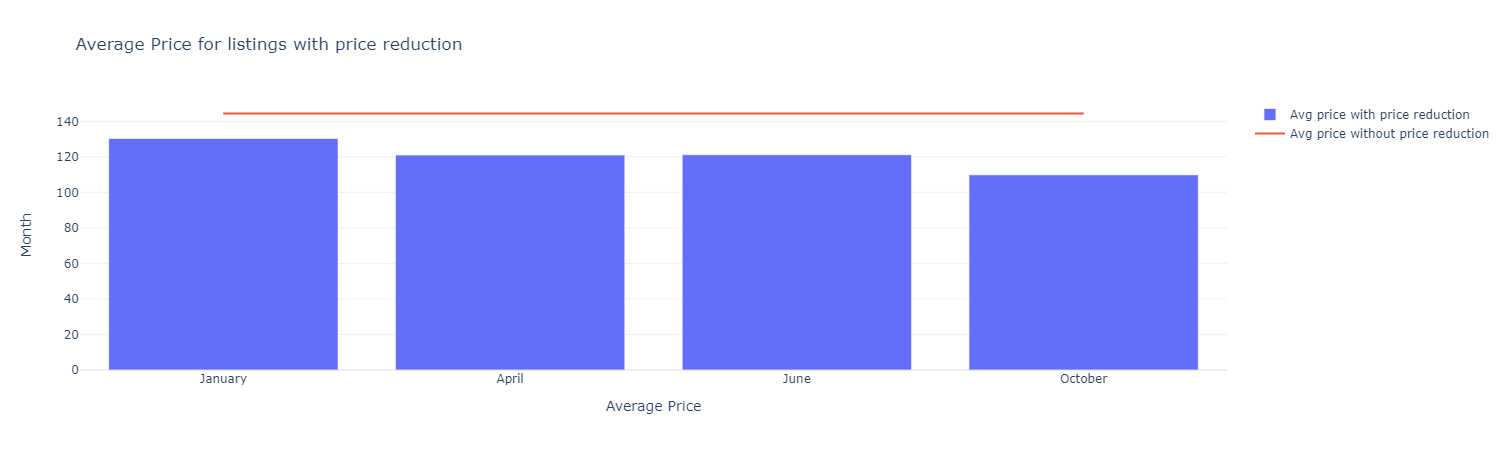

In [32]:
rentals_reduced = price_changes[price_changes['price_reduction']==True][['January','April','June','October']].transpose()
rentals_reduced = rentals_reduced.reset_index().rename(columns={'index':'Month', 1:'Avg price'})

rentals_not_reduced = price_changes[price_changes['price_reduction']==False][['January','April','June','October']].transpose()
rentals_not_reduced = rentals_not_reduced.reset_index().rename(columns={'index':'Month', 0:'Avg price'})

plot_price_reduction = go.Figure()

plot_price_reduction.add_trace(
    go.Bar(
        y=rentals_reduced['Avg price'],
        x=rentals_reduced['Month'],
        
        hovertemplate =
        '<b>Price</b>: $%{y:.0f}'+
        '<br><b>Month</b>: %{x}<br>'+
        '<b>Count of listings: </b>%{text}',
        text = [price_changes[price_changes['price_reduction']==True]['count'].max() for i in range(4)],
        
        name='Avg price with price reduction',
        orientation='v', 
    ))

plot_price_reduction.add_trace(
    go.Scatter(
        y=rentals_not_reduced['Avg price'],
        x=rentals_not_reduced['Month'],
                
        hovertemplate =
        '<b>Price</b>: $%{y:.0f}'+
        '<br><b>Month</b>: %{x}<br>'+
        '<b>Count of listings: </b>%{text}',
        text = [price_changes[price_changes['price_reduction']==False]['count'].max() for i in range(4)],
                
        mode='lines', name='Avg price without price reduction',
    ))

plot_price_reduction.update_layout(
    title='Average Price for listings with price reduction',
    xaxis_title='Average Price',
    yaxis_title='Month', 
    template=plotly_template
    )

plot_price_reduction.show()

# report_price_reduction = dp.Report(dp.Plot(plot_price_reduction) ) #Create a report
# report_price_reduction.publish(name='plot_price_reduction', open=True, visibility='PUBLIC') #Publish the report

We see, that the average price was reduced from January to April (\\$130 to \\$121) and again from June to October (\\$121 to \\$110). 

## Answer Question 1: 2. How did COVID-19 impact the Airbnb offer in Munich?

We can see, that COVID-19 seemed not to have a significant impact on the number of rentals offered. we see for each effective date a similar line, where the number of offeres decreased the farther to the future we are going. This is as well understandable, as the future has a higher uncertainty, therefore people might not offer the rentals too much in advance. 

Beyond that, we can see, the prices decreased during the time. About 37% of the offered vacation rentals had a price off compared to the prices associated to them in January. All vacation rentals where the price was reduced had in average a reduction of approx. 16%. During the time the VAT also reduced in Germany, but the VAT reduction was only 3 percent points.

# Question 3: What are the main features affecting prices for Airbnb?

In [33]:
listings_w_calendar = listing_detailed_oct.merge(calendar_oct, how='inner', right_on='listing_id', left_on='id')
listings_w_calendar = listings_w_calendar[listings_w_calendar['available']=='t'].reset_index()

In [34]:
listings_w_calendar.head().transpose()

0  \
index                                                                                       161   
id                                                                                        97945   
listing_url                                                  https://www.airbnb.com/rooms/97945   
scrape_id                                                                        20201026064122   
last_scraped                                                                         2020-10-26   
name                                                           Deluxw-Apartm. with roof terrace   
description                                   <b>The space</b><br />We offer a modern, quiet...   
neighborhood_overview                         We are living in a outskirt of Munich its call...   
picture_url                                   https://a0.muscache.com/pictures/2459996/10b4c...   
host_id                                                                                  517685   
host_url                                               https://www.airbnb.com/users/show/517685   
host_name                                                                              Angelika   
host_since                                                                           2011-04-18   
host_location                                                           Munich, Bayern, Germany   
host_about                                    Ich freue mich auf viele internationale Gäste!...   
host_response_time                                                                          NaN   
host_response_rate                                                                          NaN   
host_acceptance_rate                                                                       100%   
host_is_superhost                                                                             t   
host_thumbnail_url                            https://a0.muscache.com/im/users/517685/profil...   
host_picture_url                              https://a0.muscache.com/im/users/517685/profil...   
host_neighbourhood                                                                       Hadern   
host_listings_count                                                                           1   
host_total_listings_count                                                                     1   
host_verifications                            ['email', 'phone', 'reviews', 'jumio', 'offlin...   
host_has_profile_pic                                                                          t   
host_identity_verified                                                                        t   
neighbourhood                                                          Munich, Bavaria, Germany   
neighbourhood_cleansed                                                                   Hadern   
neighbourhood_group_cleansed                                                                NaN   
latitude                                                                                48.1148   
longitude                                                                               11.4878   
property_type                                                                  Entire apartment   
room_type                                                                       Entire home/apt   
accommodates                                                                                  2   
bathrooms                                                                                   NaN   
bathrooms_text                                                                           1 bath   
bedrooms                                                                                      1   
beds                                                                                          1   
amenities                                     ["Host greets you", "Children\u2019s books and...   
price_x                            

### Brief overview over the top 5 most common values per feature

In [35]:
for col in listings_w_calendar.columns.tolist():
    print(col + '\n')
    print(listings_w_calendar[col].value_counts().head())
    print('________________________ \n')

index

2047       1
615541     1
1172325    1
1174372    1
1170274    1
Name: index, dtype: int64
________________________ 

id

39851416    365
37360210    365
3920942     365
4109733     365
8209970     365
Name: id, dtype: int64
________________________ 

listing_url

https://www.airbnb.com/rooms/8397305     365
https://www.airbnb.com/rooms/19981675    365
https://www.airbnb.com/rooms/41971928    365
https://www.airbnb.com/rooms/4159753     365
https://www.airbnb.com/rooms/1894045     365
Name: listing_url, dtype: int64
________________________ 

scrape_id

20201026064122    853436
Name: scrape_id, dtype: int64
________________________ 

last_scraped

2020-10-26    853436
Name: last_scraped, dtype: int64
________________________ 

name

Chummy Room, 5 min to Oktoberfest        2154
PM-Rooms : Cozy hostel in Munich         2079
Comfort Single Apartment zum Innenhof    1393
TIMEHOUSE Smart Studio                   1236
Business Single Apartment                1212
Name: name, dtype: i

In [36]:
#is there a relevant difference between host_listing_count and host_total_listings_count for this analysis?
listings_w_calendar[listings_w_calendar['host_listings_count'] != listings_w_calendar['host_total_listings_count']][['host_total_listings_count', 'host_listings_count']].drop_duplicates()

host_total_listings_count  host_listings_count
258561                        NaN                  NaN

The only values, where 'host_listings_count' and 'host_total_listings_count' differ is for NaN values. So both columns are exactly the same. The column 'host_total_listings_count' will be dropped and only 'host_listing_count' will be considered.

In [37]:
#these features will be dropped as no predictive value is expected from these values
null_or_single_value_cols = ['last_scraped', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'license', 'available']
id_or_url_cols = ['id', 'listing_url', 'scrape_id', 'picture_url', 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'listing_id']

features_not_to_consider = ['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'host_neighbourhood', 'host_total_listings_count',
                            'host_verifications', 'host_has_profile_pic', 'neighbourhood', 'latitude', 'longitude', 
                            'maximum_nights_x', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
                            'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 
                            'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                            'price_y', 'adjusted_price', 'minimum_nights_y', 'maximum_nights_y']

In [38]:
def dropping_not_needed_cols(df):
    '''
    INPUT:
    df - a joined dataframe containing the information of listing_detailed and calendar

    OUTPUT:
    df - the dataframe with only the relevant columns kept. 
    
    This function will drop the columns in null_or_single_value_cols, id_or_url_cols and features_not_to_consider. 
    In case of an exception (e.g. column not in dataframe) the backup process will drop all columns except the required 
    for the below analysis.
    '''
    
    try:
        df.drop(columns=null_or_single_value_cols, inplace=True)
        df.drop(columns=id_or_url_cols, inplace=True)
        df.drop(columns=features_not_to_consider, inplace=True)
    except:
        features_to_keep = ['index', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
                            'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms',
                            'beds', 'amenities', 'price_x', 'minimum_nights_x', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                            'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
                            'instant_bookable', 'reviews_per_month', 'date']
        df.drop(columns=df.columns.difference(features_to_keep), inplace=True)


    
    return df

listings_w_calendar = dropping_not_needed_cols(listings_w_calendar)

# Feature Preparation

In [39]:
#more detailed view on the value distribution of remaining features
for col in listings_w_calendar.columns.tolist():
        print(col + '\n')
        print(listings_w_calendar[col].value_counts())
        print('________________________ \n')

index

2047       1
615541     1
1172325    1
1174372    1
1170274    1
          ..
864023     1
868117     1
855827     1
853778     1
2049       1
Name: index, Length: 853436, dtype: int64
________________________ 

host_since

2011-08-30    8712
2012-05-01    6017
2018-02-27    5806
2013-08-02    4721
2020-04-03    4631
              ... 
2015-10-15       2
2014-09-25       2
2011-12-09       1
2012-09-21       1
2011-07-25       1
Name: host_since, Length: 2021, dtype: int64
________________________ 

host_response_time

within an hour        239230
within a day          114994
within a few hours    111344
a few days or more     57339
Name: host_response_time, dtype: int64
________________________ 

host_response_rate

100%    352658
0%       45414
50%      16978
90%      13616
80%      13329
67%       8723
94%       7779
75%       6947
70%       5816
92%       5547
83%       5318
60%       5030
89%       4195
98%       3572
33%       2799
86%       2245
88%       2215
96%       2

### Transformation of "host_since" to a time_range of being a host

In [40]:
def host_for_buckets(df):
    '''
    INPUT:
    df - a dataframe containing the 'host_since' information of listing

    OUTPUT:
    df - with 'host_for_buckets'
    
    This function calculate time of being a host and cluster into <30days, <90days, <1yr, <3yrs, >3yrs buckets.
    The column 'host_since' will be DROPPPED. 
    '''

    df['host_since'] = df['host_since'].astype('datetime64[ns]')
    df['host_for'] = (datetime.datetime.strptime('2020-10-26', '%Y-%m-%d') - df['host_since']).dt.days

    bins = [0 , 30 , 90, 365, 1095, 9999]
    labels = ['less than 30 days', '30 - 90 days', '90 days - 1 year', '1 - 3 years', 'more than 3 years']

    df['host_for_buckets'] = pd.cut(df['host_for'], bins=bins, labels=labels)
    df.drop(columns=['host_since','host_for'], inplace=True)
    
    return df
    
listings_w_calendar = host_for_buckets(listings_w_calendar)

### Dealing with boolean features

In [41]:
def dealing_with_boolean_features(df):
    '''
    INPUT:
    df - a dataframe containing the information 'host_is_superhost', 'host_identity_verified', 'instant_bookable', 
        'host_several_listings' of listing and 'date' of calendar.

    OUTPUT:
    df - with the input columns processed
    
    This function will transform the features of listing to binary columns. 
    Out of the 'host_listing_count' the binary feature 'host_serveral_listing' will be calculated based on the fact, if the feature is
    greater than 1 or not. 
    The column 'host_listing_count' will be DROPPED. 
    Out of the date column the value 'octoberfest_time' will be calculated depending on the date being during the octoberfest. 
    The column date will be DROPPED.
    '''

    df['host_is_superhost'] = (df['host_is_superhost'] == 't').astype('int')
    
    df['host_identity_verified'] = (df['host_identity_verified'] == 't').astype('int')
    
    df['instant_bookable'] = (df['instant_bookable'] == 't').astype('int')
    
    df['host_several_listings'] = (df['host_listings_count'] > 1).astype('int')
    df.drop(columns=['host_listings_count'], inplace=True)
    
    df['octoberfest_time'] = ((df['date'] >= '2020-09-19') & (df['date'] <= '2020-10-04')).astype('int')
    df.drop(columns=['date'], inplace=True)
    
    return df

listings_w_calendar = dealing_with_boolean_features(listings_w_calendar)

### Transformation of ratings into "greater than or equals to 95%" and "less than 95%"

In [42]:
def greater_than_or_equals_to_95(df):
    '''
    INPUT:
    df - a dataframe containing the information 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating' of listing.

    OUTPUT:
    df - with the input columns processed
    
    This function will check, if the input features are greater or equal to 95% and create a binary feature representing this. 
    The initial input features will be DROPPED. 
    '''
    
    df['host_response_rate_greater_incl_95%'] = df['host_response_rate'].isin(['100%','99%','98%','97%','96%','95%']).astype('int')
    df.drop(columns=['host_response_rate'], inplace=True)
    
    df['host_acceptance_rate_greater_incl_95%'] = df['host_acceptance_rate'].isin(['100%','99%','98%','97%','96%','95%']).astype('int')
    df.drop(columns=['host_acceptance_rate'], inplace=True)
    
    df['review_scores_rating_greater_incl_95%'] = df['review_scores_rating'].isin(['100%','99%','98%','97%','96%','95%']).astype('int')
    df.drop(columns=['review_scores_rating'], inplace=True)
    
    return df

listings_w_calendar = greater_than_or_equals_to_95(listings_w_calendar)

### Transformation of review_scores into "greater than or equals to 9" and "less than 9"

In [43]:
def review_9_to_10_execution(df, col):
    '''
    INPUT:
    df - a dataframe.
    col - a column indicating, which column of df should be processed. 

    OUTPUT:
    df - a dataframe with processed column. 
    
    This function will check for the given column, if the value of this column is 9 or 10 and create a new binary
    feature indicating this. The new feature will be named as the input column with '_9_to_10' as suffix concatenated to it. 
    The initial input column will be DROPPED. 
    '''
    
    df[col + '_9_to_10'] = df[col].isin([10,9]).astype('int')
    df.drop(columns=[col], inplace=True)
    
def review_9_to_10_initiation(df):
    '''
    INPUT:
    df - a dataframe containing the information 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
        'review_scores_communication','review_scores_location','review_scores_value' of listing.

    OUTPUT:
    df - with the input columns processed.
    
    This function will execute the function review_9_to_10_execution for the features 'review_scores_accuracy','review_scores_cleanliness',
    'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'.
    '''
    for col in ['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']:
        review_9_to_10_execution(df, col)
    return df

listings_w_calendar = review_9_to_10_initiation(listings_w_calendar)

### Putting features into buckets which will be transformed into dummies later on

In [44]:
def feature_bucketing(df):
    '''
    INPUT:
    df - a dataframe containing the information 'accommodates', 'bedrooms', 'beds', 'minimum_nights_x', 'number_of_reviews', 'reviews_per_month' of listing.

    OUTPUT:
    df - with the input columns processed
    
    This function will transform the input columns to features holding appropriate buckets.
    '''
    
    # accomodates
    bins = [0, .9, 1, 2, 3, 4, 5, 99]
    labels = ['0 person', '1 person', '2 persons', '3 persons', '4 persons', '5 persons', 'more than 5 persons']

    df['accommodates'] = pd.cut(df['accommodates'], bins=bins, labels=labels)
    
    #bedrooms
    bins = [0, .9, 1, 2, 3, 4, 99]
    labels = ['0 bedrooms', '1 bedrooms', '2 bedrooms', '3 bedrooms', '4 bedrooms', 'more than 4 bedrooms']

    df['bedrooms'] = pd.cut(df['bedrooms'], bins=bins, labels=labels)
    
    #beds
    bins = [0, .9, 1, 2, 3, 4, 5, 99]
    labels = ['0 beds', '1 beds', '2 beds', '3 beds', '4 beds', '5 beds', 'more than 5 beds']

    df['beds'] = pd.cut(df['beds'], bins=bins, labels=labels)
    
    #minimum_nights_x
    bins = [0, .9, 1, 2, 7, 14, 28, 999]
    labels = ['0 nights', '1 night', '2 nights', '3 - 7 nights', '1 - 2 weeks', '2 - 4 weeks', 'more than 4 weeks']

    df['minimum_nights_x'] = pd.cut(df['minimum_nights_x'], bins=bins, labels=labels)
    
    #number_of_reviews
    bins = [0, .9, 5, 25, 50, 100, 9999]
    labels = ['0 reviews', '1 - 5 reviews', '5 - 25 reviews', '25 - 50 reviews', '50 - 100 reviews', 'more than 100 reviews']

    df['number_of_reviews'] = pd.cut(df['number_of_reviews'], bins=bins, labels=labels)
    
    #reviews_per_month
    bins = [0, .24, .5, 1, 1.5, 2, 99]
    labels = ['0 - 0.25 reviews', '0.25 - 0.5 reviews', '0.5 - 1 reviews', '1 - 1.5 reviews', '1.5 - 2 reviews', 'more than 2 reviews']

    df['reviews_per_month'] = pd.cut(df['reviews_per_month'], bins=bins, labels=labels)
    
    return df
    
listings_w_calendar = feature_bucketing(listings_w_calendar)

### Dealing with Amenities
1. Transformation of amenities column into lists.
2. Concatination of all lists and dropping duplicates. 
3. Per distinct amenities feature: creation of a separate column and test, if this feature is for current lising available.

In [45]:
def dummying_amenities(df):
    '''
    INPUT:
    df - a dataframe containing the information 'amenities' of listing.

    OUTPUT:
    df - a dataframe with dummy variables for each feature in the list for amenities. 
    
    This function will take each single amenity from the concatinated strings in the amenities feature. 
    For each singe amenity dummy variables will be created and the 'amenities' column will be DROPPED. 
    '''

    splitting = lambda col: col.replace('[','').replace('"','').replace(']','').split(', ')
    df['amenities_list'] = df.amenities.apply(splitting)

    amenities_list = []

    for i in range(df.shape[0]):
        amenities_list += df['amenities_list'][i]
    amenities_set = set(amenities_list)
    
    try:
        amenities_set.remove('')
    except:
        amenities_set = amenities_set

    for item in amenities_set:
        df['amenities_'+item] = df.amenities.apply(lambda x: item in x).astype('int')

    df.drop(columns=['amenities','amenities_list'], inplace=True)
    
    return df

listings_w_calendar = dummying_amenities(listings_w_calendar)

### Dummy creation for dummyable features

In [46]:
def dummy_creation(df, col):
    '''
    INPUT:
    df - a dataframe.
    col - a column indicating, which column of df should be processed. 

    OUTPUT:
    df - a dataframe with dummy variables for input column. 
    
    This function will create dummy variables for given column. The input column will be DROPPED. 
    '''
    df = pd.concat([df.drop(columns=[col]), pd.get_dummies(df[col], prefix=col, prefix_sep='_', dummy_na=False, drop_first=True)], axis=1)
    return df

def dummy_creation_initiation(df):
    '''
    INPUT:
    df - a dataframe, containing the information 'host_for_buckets','host_response_time','neighbourhood_cleansed','property_type','room_type',
        'accommodates','bathrooms_text','bedrooms','beds','minimum_nights_x','number_of_reviews','reviews_per_month' of listing.

    OUTPUT:
    df - a dataframe with dummy variables for the columns defined in INPUT. 
    
    This function will create dummy variables for 'host_for_buckets','host_response_time','neighbourhood_cleansed','property_type','room_type',
    'accommodates','bathrooms_text','bedrooms','beds','minimum_nights_x','number_of_reviews','reviews_per_month'. 
    The input columns will be DROPPED. 
    '''
    
    dummy_list = ['host_for_buckets','host_response_time','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms_text','bedrooms',
                  'beds','minimum_nights_x','number_of_reviews','reviews_per_month']
    
    for item in dummy_list:
        df = dummy_creation(df, item)
        
    return df

listings_w_calendar = dummy_creation_initiation(listings_w_calendar)

### DF model finalization

In [47]:
def df_model_finalization(df):
    '''
    INPUT:
    df - a dataframe.

    OUTPUT:
    X - a features dataframe
    y - a response dataframe
    
    This function will drop the column 'index', cast price_x to float and split the df into a features dataframe and a response dataframe. 
    '''
    
    df.drop(columns=['index'], inplace=True)
    df['price_x'] = df['price_x'].str.replace('$', '').str.replace(',', '').astype('float')
    
    X = df.drop(columns=['price_x'])
    y = df['price_x']
    
    return X, y

X, y = df_model_finalization(listings_w_calendar)

### Applying ML Models

In [48]:
def do_machine_learning(model, features, response, test_size=.3, random_state=42, return_all=False):
    '''
    INPUT:
    model - the ML model to use. (either LinearRegression() or RandomForestRegressor()) 
    features - the feature dataframe
    response - the response dataframe
    test_size - the test_size to use for train_test_split (default = .3)
    random_state - the random_state to use for train_test_split (default = 42)
    return_all - affecting the OUTPUT (default = False)

    OUTPUT:
    if return_all = True
        model - the fit model of choice
        X_train - the train set of the features dataframe
        X_test - the test set of the features dataframe
        y_train - the train set of response dataframe
        y_test - the test set of response dataframe
        y_train_preds - the predicted response values for X_train
        y_test_preds - the predicted response values for X_test
    if return_all = False (default)
        model - the fit model of choice
        X_train - the train set of the features dataframe
    
    This function will split the features and response dataframes based into train and test datasets. 
    The model will be initiated and fit to the train datasets. The response values will be predicted and the prediction 
    will be scored based on the r2 score. The test and train score will be printed and depending on the 'return_all' input
    value the model will return either only the model and X_train (default) or all data. 
    
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=test_size, random_state=random_state)
    
    model = model
    model.fit(X_train, y_train)
    
    y_test_preds = model.predict(X_test)
    y_train_preds = model.predict(X_train)

    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    
    print('test_score: '+str(test_score))
    print('train_score: '+str(train_score))
    
    if return_all:
        return model, X_train, X_test, y_train, y_test, y_train_preds, y_test_preds
    else:
        return model, X_train

In [49]:
#Out of curiousity - what is the r2 score using Linear Regression
lr_model, X_train = do_machine_learning(LinearRegression(normalize=True), X, y)

test_score: 0.24247817595093246
train_score: 0.22344780830672628


In [50]:
#Training using Random Forest Regressor
rf_model, X_train = do_machine_learning(RandomForestRegressor(), X, y)

test_score: 0.9999777928090711
train_score: 0.9999815393797129


In [51]:
def retrieve_feature_importance_from_rf_model(rf_model, X_train, number_of_features=100):
    '''
    INPUT:
    rf_model - a fit random forest model
    X_train - the features dataframe used to train the model
    number_of_features - the number of features the output dataframe should include. (default = 100)

    OUTPUT:
    df_feature_imp - a dataframe holding the ranked top X (default = 100) features with the highest importance in the given rf_model
    
    This function will retrieve the features importance out of the model. Using the list of features held by the features dataframe a 
    ranked list will be created and returned. 
    ''' 

    feature_imp = rf_model.feature_importances_
    df_feature_imp = pd.concat([X_train.columns.to_frame().reset_index().drop(columns=[0]), pd.DataFrame(feature_imp)], axis=1)

    df_feature_imp.rename(columns={0:'importance', 'index':'feature'}, inplace=True)
    df_feature_imp = df_feature_imp.sort_values('importance', ascending=True).reset_index().tail(number_of_features)
    
    return df_feature_imp

df_feature_imp_oct = retrieve_feature_importance_from_rf_model(rf_model, X_train)

In [52]:
#cleaning feature wording to make them more comprehensible

rename_dict = {'bathrooms_text_1 bath':'1 bath',
               'neighbourhood_cleansed_Ludwigsvorstadt-Isarvorstadt':'Rental inIsarvorstadt',
               'amenities_Heating':'Heating',
               'host_response_rate_greater_incl_95%':'High host response rate',
               'amenities_Hot water':'Hot water',
               'host_several_listings':'Host has several rentals',
               'host_identity_verified':'Host identity is verified',
               'number_of_reviews_1 - 5 reviews':'Listing has 1-5 reviews',
               'property_type_Private room in condominium':'Rental is private room in condominium',
               'accommodates_more than 5 persons':'Accomodates > 5 persons',
               'amenities_Smoke alarm':'Smoke alarm available',
               'amenities_Pool':'Pool available',
               'room_type_Private room':'Rental is private room',
               'neighbourhood_cleansed_Obergiesing':'Rental in Obergiesing',
               'bedrooms_4 bedrooms':'4 bedrooms',
               'property_type_Entire villa':'Entire villa',
               'neighbourhood_cleansed_Au-Haidhausen':'Rental in Au-Haidhausen',
               'amenities_Air conditioning':'Air conditioning available',
               'amenities_Essentials':'Essentials available',
               'neighbourhood_cleansed_Maxvorstadt':'Rental in Maxvorstadt',
              }

df_feature_imp_oct.replace({'feature':rename_dict}, inplace=True)

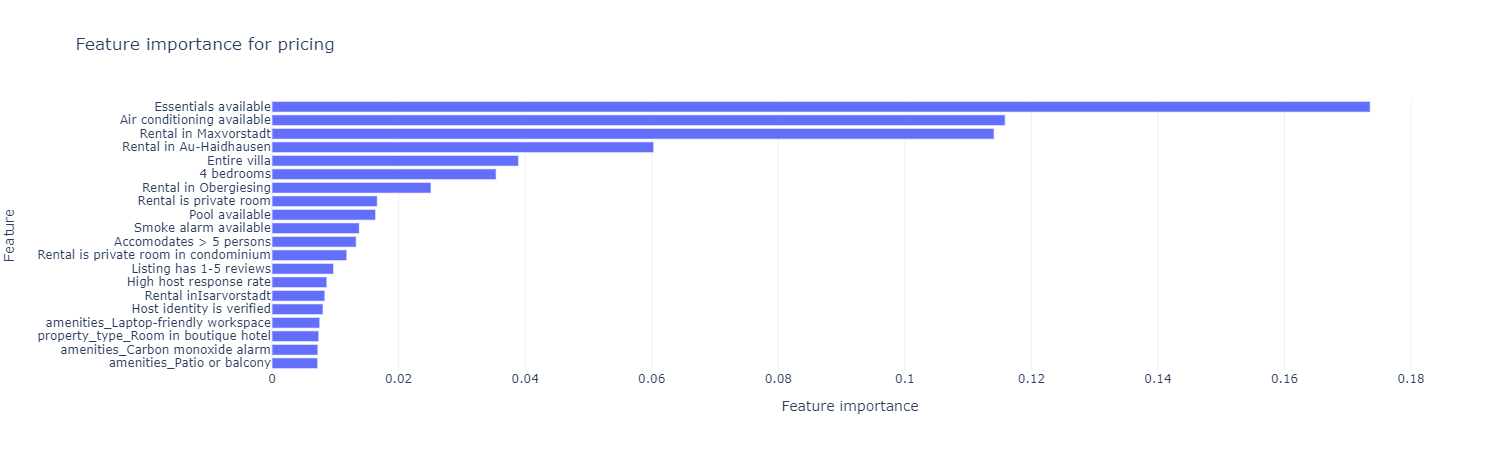

In [53]:
# Creating plot for feature importance
plot_feature_importance = go.Figure()

plot_feature_importance.add_trace(
    go.Bar(
        y=df_feature_imp_oct.tail(20)['feature'],
        x=df_feature_imp_oct.tail(20)['importance'],
        
        hovertemplate =
        '<b>feature</b>: %{y}'+
        '<br><b>Importance</b>: %{x:.3f}',
        
        name='Mean price markup',
        orientation='h'
    ))

plot_feature_importance.update_layout(
    title='Feature importance for pricing',
    xaxis_title='Feature importance',
    yaxis=dict(
        title='Feature',
        tickmode='linear'),
    template=plotly_template,
    )

plot_feature_importance.show()

# report_feature_importance = dp.Report(dp.Plot(plot_feature_importance) ) #Create a report
# report_feature_importance.publish(name='plot_feature_importance', open=True, visibility='PUBLIC') #Publish the report

The graph shows the features ranked by the importance the Random Fores Regressor used to predict the rental price in Munich. 

## Question 3: What are the main features affecting prices for Airbnb?

In the plot we can see, which features have the highest impact on the rental pricing. 
the Top 10 features for price influence in descending order are:
1. Rental in neighbourhood Maxvorstadt
2. Air conditioning available
3. Essentials available
4. Rental in neighbourhood Haishausen
5. Rental is an entire villa
6. Rental has 4 bedrooms
7. Rental in neighbourhood Obergiesing
8. Room type is a private room
9. Pool available
10. Smoke alarm available (interesting, as Smoke alarm is per law mandatory)

The most important neighbourhoods in terms of price influence in Munich are the districts are in Maxvorstadt (district 3), Haishausen (district 5) and Obergiesing (district 17). 
The other most important features define a luxury equipment or describe the size of the rental.  

![title](Munich/Map_of_districts_in_Munich.png)